# 5 Basic Probability and Statistical Analysis Using SciPy

# 5.1 Exploring the Relationships between Data and Probability Using SciPy

The SciPy library includes an entire module for addressing problems in
probability and statistics; `scipy.stats`. Lets import that module.

**Listing 5. 1. Importing the `stats` module from SciPy**

In [1]:
from scipy import stats

Chapter One we computed the probability of a fair coin producing at-least 16 heads after 20 flips. SciPy allows us
to measure this probability directly using the `stats.binomial_test` method.

**Listing 5. 2. Analyzing extreme head-counts using SciPy**

In [2]:
num_heads = 16
num_flips = 20
prob_head = 0.5
prob = stats.binom_test(num_heads, num_flips, prob_head)
print(f"Probability of observing more than 15 heads or 15 tails is {prob:.17f}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


Our method-call returned the probability of seeing a coin-flip sequence where 16 or more coins fell on the same face. If we want the probability seeing exactly 16 heads, then we must utilize the `stats.binom.pmf` method.

**Listing 5. 3. Computing an exact probability using `stats.binom.pmf`**

In [3]:
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head)
print(f"The probability of seeing {num_heads} of {num_flips} heads is {prob_16_heads}")

The probability of seeing 16 of 20 heads is 0.004620552062988271


We’ve used `stats.binom.pmf` to find the probability of seeing exactly 16 heads. However, that method is also able to compute multiple probabilities simultaneously.

**Listing 5. 4. Computing an array of probabilities using `stats.binom.pmf`**

In [4]:
probabilities = stats.binom.pmf([4, 16], num_flips, prob_head)
assert probabilities.tolist() == [prob_16_heads] * 2

List-passing allows us to easily compute probabilities across intervals. For example, if we pass `range(21)` into `stats.binom.pmf`, then the outputted array will contain all probabilities across the interval of every possible head-count.

**Listing 5. 5. Computing an interval probability using `stats.binom.pmf`**

In [5]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob = probabilities.sum()
print(f"Total sum of probabilities equals {total_prob:.14f}")

Total sum of probabilities equals 1.00000000000000


Plotting `interval_all_counts` versus `probabilities` will reveal the shape of our 20 coin-flip distribution.

**Listing 5. 6. Plotting a 20 coin-flip Binomial Distribution**

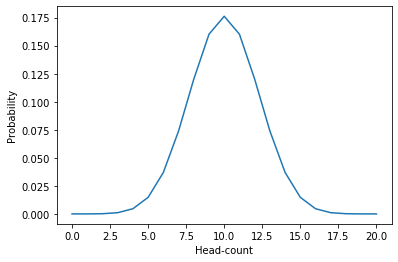

In [117]:
import matplotlib.pyplot as plt
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

The `stats.binom.pmf` methods allows to display any distribution associated with an arbitrary coin-flip count. Let's simultaneously plot the distributions for 20, 80, 140, and 200 coin-flips.

**Listing 5. 7. Plotting 5 different Binomial distributions**

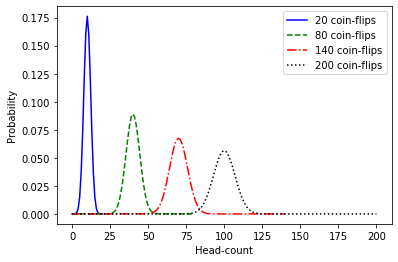

In [118]:
flip_counts = [20, 80, 140, 200]
linestyles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'k']

for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
    x_values = range(num_flips + 1)
    y_values = stats.binom.pmf(x_values, num_flips, 0.5)
    plt.plot(x_values, y_values, linestyle=linestyle, color=color,
             label=f'{num_flips} coin-flips')
plt.legend()
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

The plotted distributions grow more dispersed around their central positions as these central positions relocate right.

## 5.2. Mean as a Measure of Centrality

Suppose we've measured noon-time measurements over course of the 7 days.  These temperatures are stored in a NumPy array.

** Listing 5. 8. Storing recorded temperatures in a NumPy array**

In [119]:
import numpy as np
measurements = np.array([80, 77, 73, 61, 74, 79, 81])

We'll now attempt to summarize our measurements using a single central value. First, we'll plot the sorted temperatures in order to evaluate their centrality.

** Listing 6. 8. Plotting the recorded temperatures**

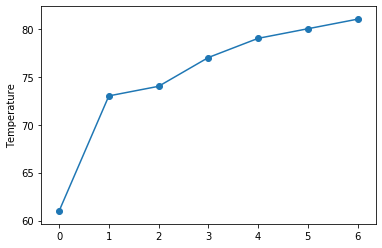

In [120]:
measurements.sort()
number_of_days = measurements.size
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel('Temperature')
plt.show()

Based on the plot, a central temperature exists somewhere between 60 degrees and 80 degrees. Let’s quantitate our estimate as the mid-point between the lowest value and the highest value in the plot.

**Listing 5. 10. Finding the midpoint temperature**

In [121]:
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min()) / 2
print(f"The midpoint temperature is {midpoint} degrees")

The midpoint temperature is 71.0 degrees


Let’s mark that midpoint in our plot using a horizontal line. We’ll draw the horizontal line by calling `plt.axhline(midpoint)`.

**Listing 5. 11. Plotting the midpoint temperature**

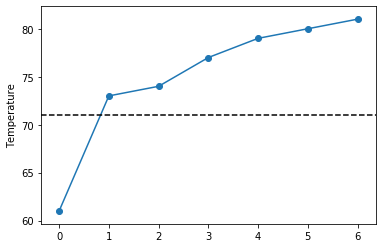

In [122]:
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--')
plt.ylabel('Temperature')
plt.show()

Our plotted midpoint seems a little low. Intuitively, our central value should split the measurements more evenly.  The middle array element, which statisticians call the **median**, will split our measurements into exactly equal parts.

**Listing 5. 12. Plotting the median temperature**

The median temperature is 77 degrees


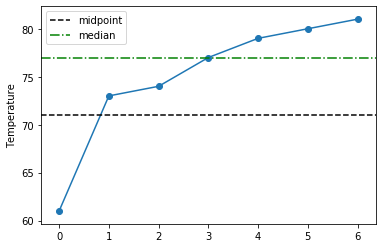

In [123]:
median = measurements[3]
print(f"The median temperature is {median} degrees")
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='midpoint')
plt.axhline(median, color='g', linestyle='-.', label='median')
plt.legend()
plt.ylabel('Temperature')
plt.show()


Our median split is not as balanced as it could be. Perhaps we can balance the split by penalizing the median for being too far from the minimum. We'll carry out this penalty using **squared distance**. If we penalize our central value based on its distance to the minimum then the squared distance penalty will grow noticeably larger as it drifts away from 61 degrees.

**Listing 5. 13. Penalizing centers using squared distance from minimum**

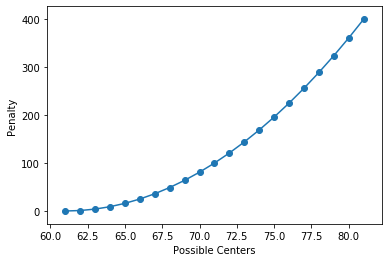

In [124]:
def squared_distance(value1, value2):
    return (value1 - value2) ** 2

possible_centers = range(measurements.min(), measurements.max() + 1)
penalties = [squared_distance(center, 61) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

As the plotted centers shift towards the minimum, the penalty will drop, but their distance to the remaining 6 measurements will increase. Thus, we ought to penalize each potential center based on its squared distance to all 7 recorded measurements.

**Listing 5. 14. Penalizing centers using total sum of squared distances**

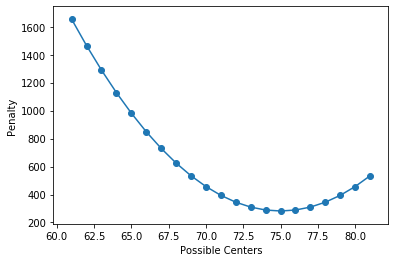

In [125]:
def sum_of_squared_distances(value, measurements):
    return sum(squared_distance(value, m) for m in measurements)

penalties = [sum_of_squared_distances(center, measurements) 
             for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

Based on our plot, the temperature of 75 degrees incurs the lowest penalty. We’ll informally
refer to this temperature value as our "least-penalized center".

**Listing 5. 15. Plotting the least-penalized temperature**

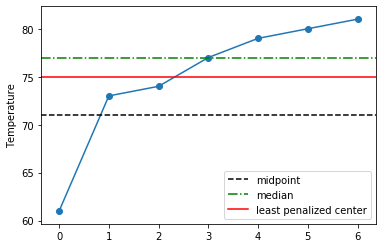

In [126]:
least_penalized = 75
assert least_penalized == possible_centers[np.argmin(penalties)]

plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='midpoint')
plt.axhline(median, color='g', linestyle='-.', label='median')
plt.axhline(least_penalized, color='r', linestyle='-', 
            label='least penalized center')
plt.legend()
plt.ylabel('Temperature')
plt.show()

Mathematicians have shown that sum of squared distances error is always minimized by the **average** value of a dataset. Thus, we can compute the least-penalized center directly. We simply need to sum all the elements in
`measurements` and then divide that sum by the array size.

**Listing 5. 16. Computing the least-penalized center using an average value**

In [127]:
assert measurements.sum() / measurements.size == least_penalized

A summed array of values divided by array size is  referred to as the **mean** or average of the array. We can compute an array's mean using NumPy.

**Listing 5. 17. Computing the mean using NumPy**

In [128]:
mean = measurements.mean()
assert mean == least_penalized
assert mean == np.mean(measurements)
assert mean == np.average(measurements)

The `np.average` method differs from the `np.mean` method because it takes as input an optional `weights` parameter. The `weights` parameter is a list of numeric weights that capture the importance of our the measurements relative to each other.

**Listing 5. 18. Passing weights into `np.average`**

In [129]:
equal_weights = [1] * 7
assert mean == np.average(measurements, weights=equal_weights)

unequal_weights = [100] + [1] * 6
assert mean != np.average(measurements, weights=unequal_weights) 

The `weights` parameter is useful for computing the mean across duplicate measurements. Lets find the mean of a 10-temperature array where 75 degrees appears 9 times, and 77 degrees appears just once.

**Listing 5. 19. Computing the weighted mean of duplicate values**

In [130]:
weighted_mean = np.average([75, 77], weights=[9, 1])
print(f"The mean is {weighted_mean}")
assert weighted_mean == np.mean(9 * [75] + [77]) == weighted_mean

The mean is 75.2


We can convert our absolute counts of 9 and 1 into relative weights of 900 and 100, and the final value of `weighted_mean` will remain the same. This is also true if the weights are converted into relative probabilities of
0.9 and 0.1.

**Listing 5. 20. Computing the weighted mean of relative weights**

In [131]:
assert weighted_mean == np.average([75, 77], weights=[900, 100])
assert weighted_mean == np.average([75, 77], weights=[0.9, 0.1])

We can treat probabilities as weights. Consequently, this allows us to compute the mean of
any probability distribution.

### 5.2.1. Finding the Mean of a Probability Distribution

We'll compute the mean of a 20 coin-flip Binomial distribution by passing a `probabilities` array to into the `weights` parameter of `np.average`. 

**Listing 5. 21. Computing the mean of a Binomial distribution**

The mean of the Binomial is 10.00 heads


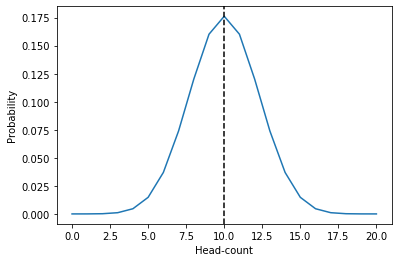

In [132]:
num_flips = 20
interval_all_counts = range(num_flips + 1)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)
mean_binomial = np.average(interval_all_counts, weights=probabilities)
print(f"The mean of the Binomial is {mean_binomial:.2f} heads")
plt.plot(interval_all_counts, probabilities)
plt.axvline(mean_binomial, color='k', linestyle='--')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

The mean perfectly captures the Binomial’s centrality. That is why SciPy permits us to obtain the mean of any Binomial simply by calling `stats.binom.mean`.

**Listing 5. 22. Computing the Binomial mean using SciPy**

In [133]:
assert stats.binom.mean(num_flips, 0.5) == 10

Using the stats.binom.mean method, we can rigorously analyze the relationship between Binomial centrality and coin-flip count. Let’s plot the Binomial mean across a range of coin-flip counts spanning from 0 to 500.

**Listing 5. 23. Plotting multiple Binomial means**

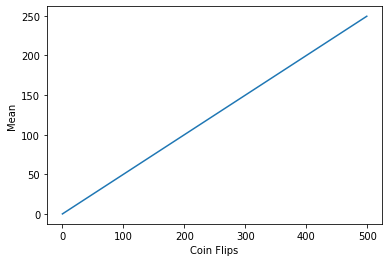

In [134]:
means = [stats.binom.mean(num_flips, 0.5) for num_flips in range(500)]
plt.plot(range(500), means)
plt.xlabel('Coin Flips')
plt.ylabel('Mean')
plt.show()

With this in mind, let's consider the mean of the single coin-flip Binomial distribution (which is commonly called the **Bernoulli** distribution). The Bernoulli distribution has a coin-flip count of 1, so its mean is equal to 0.5

**Listing 5. 24. Predicting the mean of a Bernoulli distribution**

In [135]:
num_flips = 1
assert stats.binom.mean(num_flips, 0.5) == 0.5

We can leverage the observed linear relationship to predict the mean of a 1000 coin-flip distribution. We expect that mean to equal 500, and for it to be positioned in the distribution’s center.

**Listing 5. 25. Predicting the mean of a 1000 coin-flip distribution**

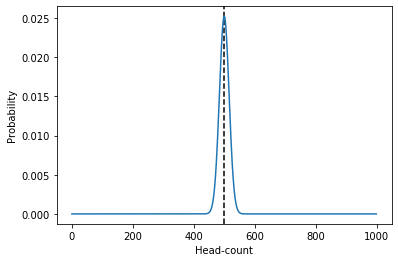

In [136]:
num_flips = 1000
assert stats.binom.mean(num_flips, 0.5) == 500

interval_all_counts = range(num_flips)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, 0.5)
plt.axvline(500, color='k', linestyle='--')
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()


A distribution’s mean serves as an excellent measure of centrality. Let’s now explore the use of variance as a measure of dispersion.
## 5.3. Variance as a Measure of Dispersion

Consider a scenario where we measure the summer temperatures in California and Kentucky. We’ll store these hypothetical temperature measurements, and then compute their means.

**Listing 5. 26. Measuring the means of multiple temperature arrays**

In [137]:
california = np.array([52, 77, 96])
kentucky = np.array([71, 75, 79])

print(f"Mean California temperature is {california.mean()}")
print(f"Mean Kentucky temperatures is {california.mean()}")


Mean California temperature is 75.0
Mean Kentucky temperatures is 75.0


The means of the 2 measurement arrays both equal 75.  Despite this, the 2 measurement arrays are far from equal. The California temperatures are much more dispersed and unpredictable.  We'll visualize this difference in dispersion by plotting the 2 measurement arrays.

**Listing 5. 27. Visualizing the difference in dispersion**

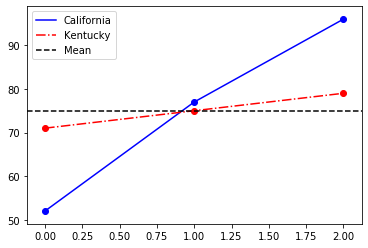

In [138]:
plt.plot(range(3), california, color='b', label='California')
plt.scatter(range(3), california, color='b')
plt.plot(range(3), kentucky, color='r', linestyle='-.', label='Kentucky')
plt.scatter(range(3), kentucky, color='r')
plt.axhline(75, color='k', linestyle='--', label='Mean')
plt.legend()
plt.show()

Within the plot, the 3 Kentucky temperatures nearly overlap with the flat mean. Meanwhile, the majority of California temperatures are noticeably more distant from the mean. Let's penalize the California measurements for being
too distant from their center, using a **sum of squares** penalty.

**Listing 5. 28. Computing California’s sum of squares**

In [139]:
def sum_of_squares(data):
    mean = np.mean(data)
    return sum(squared_distance(value, mean) for value in data)

california_sum_squares = sum_of_squares(california)
print(f"California's sum of squares is {california_sum_squares}")

California's sum of squares is 974.0


California’s sum of squares is 974. We expect Kentucky’s sum of squares to be noticeably lower.

**Listing 5. 29. Computing Kentucky’s sum of squares**

In [140]:
kentucky_sum_squares = sum_of_squares(kentucky)
print(f"Kentucky's sum of squares is {kentucky_sum_squares}")

Kentucky's sum of squares is 32.0


The sum of squares helps us measure dispersion. However, the
measurement is not perfect. Suppose we duplicate the temperatures within the
California array by recording each temperature twice. The level of dispersion will remain the same even though the sum of squares will double.

**Listing 5. 30. Computing sum of squares after array duplication**

In [141]:
california_duplicated = np.array(california.tolist() * 2)
duplicated_sum_squares = sum_of_squares(california_duplicated)
print(f"Duplicated California sum of squares is {duplicated_sum_squares}")
assert duplicated_sum_squares == 2 * california_sum_squares

Duplicated California sum of squares is 1948.0


The sum of squares is not a good measure of dispersion because it’s influenced by the size of an inputted array. Fortunately, that influence is easy to eliminate. We simply divide the sum of squares by the array size.

**Listing 5. 31. Dividing sum of squares by array size**

In [142]:
value1 = california_sum_squares / california.size
value2 = duplicated_sum_squares / california_duplicated.size
assert value1 == value2

Dividing sum of squares by the number of measurements produces what statisticians call the **variance**. Conceptually, the variance is equal to the average squared distance from the mean.

**Listing 5. 32. Computing the variance from mean squared distance**

In [143]:
def variance(data):
    mean = np.mean(data)
    return np.mean([squared_distance(value, mean) for value in data])

assert variance(california) == california_sum_squares / california.size

The variances for the california and california_duplicated arrays will equal, since their levels of dispersion are identical.

**Listing 5. 33. Computing the variance after array duplication**

In [144]:
assert variance(california) == variance(california_duplicated)

Meanwhile, the variances for the California and Kentucky arrays will retain their 30-fold ratio caused by a difference in dispersion.

**Listing 5. 34. Comparing the variances of California and Kentucky**

In [145]:
california_variance = variance(california)
kentucky_variance = variance(kentucky)
print(f"California Variance is {california_variance}")
print(f"Kentucky Variance is {kentucky_variance}")

California Variance is 324.6666666666667
Kentucky Variance is 10.666666666666666


Variance can be computed by calling `np.var` on a Python list or NumPy array. The variance of a NumPy array can also be computed using the array’s built-in `var` method.

**Listing 5. 35. Computing the variance using NumPy**

In [146]:
assert california_variance == california.var()
assert california_variance == np.var(california)

Variance is dependent on the mean. If we compute a weighted mean, then we must also compute a weighted variance. The weighted variance is simply the weighted average of all the squared distances from the weighted mean. 

**Listing 5. 36. Computing the weighted variance using np.average**

In [147]:
def weighted_variance(data, weights):
    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)

assert weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77]) 

The `weighted_variance` function can take as its input an array of probabilities. This allows us to compute the variance of any probability distribution.

### 5.3.1. Finding the Variance of a Probability Distribution**

Lets compute variance of the Binomial distribution associated with 20 fair coin-flips. We’ll run the computation by assigning a `probabilities array` to the `weights` parameter of `weighted_variance.`

**Listing 5. 37. Computing the variance of a Binomial distribution**

In [148]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)
variance_binomial = weighted_variance(interval_all_counts, probabilities)
print(f"The variance of the Binomial is {variance_binomial:.2f} heads")

The variance of the Binomial is 5.00 heads


The Binomial’s variance is 5, which is equal to half the Binomial’s mean. That variance can be computed more directly using SciPy’s `stats.binom.var` method.

**Listing 5. 38. Computing the Binomial variance using SciPy**

In [149]:
assert stats.binom.var(20, prob_head) == 5.0
assert stats.binom.var(20, prob_head) == stats.binom.mean(20, prob_head) / 2

Using the `stats.binom.var` method, we can rigorously analyze the relationship between Binomial dispersion and coin-flip count. Let's plot the Binomial variance across a range of coin-flip counts spanning from 0 to 500. 

**Listing 5. 39. Plotting multiple Binomial variances**

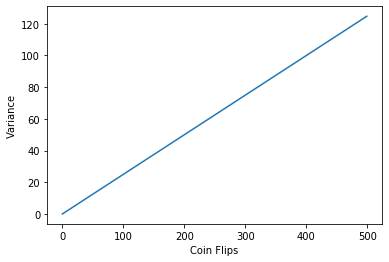

In [150]:
variances = [stats.binom.var(num_flips, prob_head) 
             for num_flips in range(500)]
plt.plot(range(500), variances)
plt.xlabel('Coin Flips')
plt.ylabel('Variance')
plt.show()

The variance is equal to one-fourth the coin-flip count. Thus, the Bernoulli distribution has a
variance of 0.25, because its coin-flip count is 1. By this logic, we can expect a variance of 250 for a 1000 coin-flip distribution.

**Listing 5. 40. Predicting Binomial variances**

In [151]:
assert stats.binom.var(1, 0.5) == 0.25
assert stats.binom.var(1000, 0.5) == 250

The variance is powerful measure of data dispersion. However, statisticians often use an alternative measure, which they call the **standard deviation**. The standard deviation is equal to the square-root of the variance.

**Listing 5. 41. Computing the standard deviation**

In [152]:
data = [1, 2, 3]
standard_deviation = np.std(data)
assert standard_deviation ** 2 == np.var(data)

# 6. Making Predictions Using the Central Limit Theorem and SciPy

## 6.1. Manipulating the Normal Distribution Using SciPy

Let's generate a Normal distribution by plotting a histogram of coin-flip samples. Each sample will represent 10,000 flipped coins. If we use the sample size to divide the sum of values in the sample, we will compute the observed head-count frequency. Conceptually, this frequency is equal to simply taking the sample's mean.

**Listing 6. 1. Computing head-count frequencies**

In [153]:
np.random.seed(0)
sample_size = 10000
sample = np.array([np.random.binomial(1, 0.5) for _ in range(sample_size)])
head_count = sample.sum()
head_count_frequency = head_count / sample_size
assert head_count_frequency == sample.mean()

We can compute 100,000 head-count frequencies in just a single line of code.

**Listing 6.2. Computing 100,000 head-count frequencies**

In [154]:
np.random.seed(0)
frequencies = np.random.binomial(sample_size, 0.5, 100000) / sample_size

Each sampled frequency equals the mean of 10,000 randomly flipped coins. Therefore, we’ll rename our frequencies variable as `sample_means`. We’ll then proceed to visualize our `sample_means` data as a histogram.

**Listing 6. 3. Visualizing sample means in a histogram**

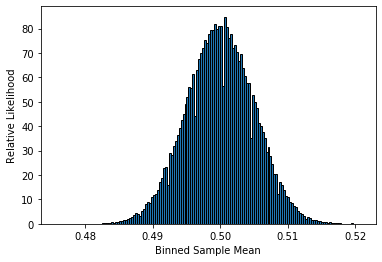

In [155]:
sample_means = frequencies
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', 
                                     edgecolor='black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

The histogram is shaped like a Normal distribution. Let’s calculate the distribution’s mean
and standard deviation.

**Listing 6. 4. Computing mean and standard deviation of a histogram**

In [156]:
mean_normal = np.average(bin_edges[:-1], weights=likelihoods)
var_normal = weighted_variance(bin_edges[:-1], likelihoods)
std_normal = var_normal ** 0.5
print(f"Mean is approximately {mean_normal:.2f}")
print(f"Standard deviation is approximately {std_normal:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


The distribution’s mean is approximately 0.5, and its standard deviation is approximately 0.005. In a Normal distribution, these values can be computed directly from the distribution’s peak.

**Listing 6. 5. Computing mean and standard deviation from peak coordinates**

In [157]:
import math
peak_x_value = bin_edges[likelihoods.argmax()]
print(f"Mean is approximately {peak_x_value:.2f}")
peak_y_value = likelihoods.max()
std_from_peak = (peak_y_value * (2* math.pi) ** 0.5) ** -1
print(f"Standard deviation is approximately {std_from_peak:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


Additionally, we can compute the mean and standard deviation simply by calling `stats.norm.fit(sample_means)`.

**Listing 6. 6. Computing mean and standard deviation using `stats.norm.fit`**

In [158]:
fitted_mean, fitted_std = stats.norm.fit(sample_means)
print(f"Mean is approximately {fitted_mean:.2f}")
print(f"Standard deviation is approximately  {fitted_std:.3f}")

Mean is approximately 0.50
Standard deviation is approximately  0.005


The computed mean and standard deviation can be used to reproduce our Normal curve. We can regenerate the curve calling `stats.norm.pdf(bin_edges, fitted_mean, fitted_std)`.

**Listing 6. 7. Computing Normal likelihoods using `stats.norm.pdf`**

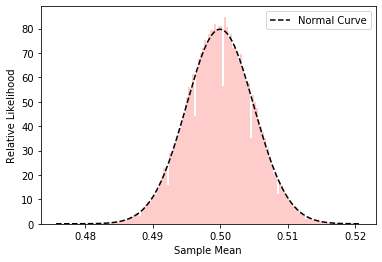

In [159]:
normal_likelihoods = stats.norm.pdf(bin_edges, fitted_mean, fitted_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--', 
         label='Normal Curve')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

The plotted curve's peak sits at an x-axis position of 0.5, and rises to a y-axis position of approximately 80. Lets shift the peak 0.01 units to the right, while also doubling the peak's height. 

**Listing 6. 8. Manipulating a Normal curve’s peak coordinates**

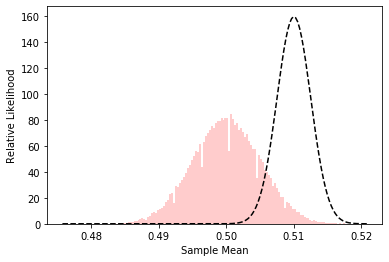

In [160]:
adjusted_likelihoods = stats.norm.pdf(bin_edges, fitted_mean + 0.01, 
                                      fitted_std / 2)
plt.plot(bin_edges, adjusted_likelihoods, color='k', linestyle='--')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

### 6.1.1. Comparing Two Sampled Normal Curves

Let's quadruple the coin-flip sample size to 40,000 and plot the resulting distribution changes. Below, we compare the plotted shapes of the old and updated Normal distributions, which we'll label as A and B, respectively. 

**Listing 6. 9. Plotting two curves with different samples sizes**

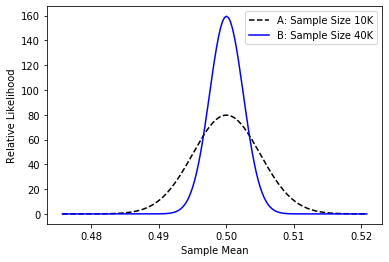

In [161]:
np.random.seed(0)
new_sample_size = 40000
new_head_counts = np.random.binomial(new_sample_size, 0.5, 100000)
new_mean, new_std = stats.norm.fit(new_head_counts / new_sample_size)
new_likelihoods = stats.norm.pdf(bin_edges, new_mean, new_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--', 
         label='A: Sample Size 10K')
plt.plot(bin_edges, new_likelihoods, color='b', label='B: Sample Size 40K')
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

Both Normal distributions are centered around the sample mean value of 0.5. This represents an estimate of the true Bernoulli mean. Let's calculate the 95% confidence interval for the true Bernoulli mean, using Normal Distribution B. SciPy allows us to compute that interval by calling `stats.norm.interval(0.95, mean, std)`. 

**Listing 6. 10. Computing a confidence interval using SciPy**

In [162]:
mean, std = new_mean, new_std
start, end = stats.norm.interval(0.95, mean, std)
print(f"The true mean of the sampled binomial distribution is between {start:.3f} and {end:.3f}")

The true mean of the sampled binomial distribution is between 0.495 and 0.505


We are 95% confident that the true mean of our sampled Bernoulli distribution is between 0.495 and 0.505. In fact, that mean is equal to exactly 0.5. We can confirm this using SciPy.

**Listing 6. 11. Confirming the Bernoulli mean**

In [163]:
assert stats.binom.mean(1, 0.5) == 0.5

Let's now attempt to estimate the variance of the Bernoulli distribution based on the plotted Normal curves. The peak of Distribution B is twice as high as the peak of Distribution A. This height is inversely proportional to the standard deviation. Thus, we can infer that the variance of Distribution B is one-fourth the variance of Distribution A. 

**Listing 6. 12. Assessing shift in variance after increased sampling**

In [164]:
variance_ratio = (new_std ** 2) / (fitted_std ** 2) 
print(f"The ratio of variances is approximately {variance_ratio:.2f}")

The ratio of variances is approximately 0.25


It appears that variance is inversely proportional to sample size. If so, than a four-fold decrease in sample size from 10,000 to 2500 should generate a four-fold increase in the variance.

**Listing 6. 13. Assessing shift in variance after decreased sampling**

In [165]:
np.random.seed(0)
reduced_sample_size = 2500
head_counts = np.random.binomial(reduced_sample_size, 0.5, 100000)
_, std = stats.norm.fit(head_counts / float(reduced_sample_size))
variance_ratio = (std ** 2) / (fitted_std ** 2) 
print(f"The ratio of variances is approximately {variance_ratio:.1f}")

The ratio of variances is approximately 4.0


A four-fold decrease in the sample size leads to a four-fold increase in the variance. Thus, if we decrease the sample size from 10,000 to 1, we can expect 10,000-fold increase in the variance.

**Listing 6. 14. Predicting variance for a sample size of 1**

In [166]:
estimated_variance = (fitted_std ** 2) * 10000
print(f"Estimated variance for a sample size of 1 is {estimated_variance:.2f}")

Estimated variance for a sample size of 1 is 0.25


If the sample size were 1, then our `sample_means`  array would simply be a sequence of randomly recorded ones and zeroes. By definition, that array would represent the output of the Bernoulli distribution. Consequently, our estimated variance for a sample size of 1 equals the variance of the Bernoulli distribution. 

**Listing 6. 15. Confirming the predicted variance for a sample size of 1**

In [167]:
assert stats.binom.var(1, 0.5) == 0.25

According the Central Limit Theorem, sampling mean-values from almost any distribution will produce a Normal curve. The mean of the Normal curve will approximate the mean of the underlying distribution. Also, the variance of the Normal curve multiplied by the sample size will approximate the variance of the underlying distribution. Using this relationship, we can estimate both mean and variance of almost any distribution through random sampling.

## 6.2. Determining Mean and Variance of a Population through Random Sampling

Suppose we are tasked with finding the average age of people living in a town. The town's population is exactly 50,000 people. Below, we'll simulate the ages of the townsfolk using the `np.random.randint` module.

In [168]:
np.random.seed(0)
population_ages = np.random.randint(1, 85, size=50000)

The mean of the entire population is the **population mean**. The variance of an entire population is the **population variance**. Let's quickly compute the population mean and population variance of our simulated town.

**Listing 6. 17. Computing population mean and variance**

In [169]:
population_mean = population_ages.mean()
population_variance = population_ages.var()

Computing the population mean is easy when we have simulated data. However, obtaining that data in real life would be incredibly time consuming. A simpler approach would be to interview 10 randomly chosen people in the town. We'd record the ages from this random sample, and afterwards compute the sample mean. Let's simulate the sampling process by drawing 10 random ages from the `np.random.choice` module.

**Listing 6. 18. Simulating 10 interviewed people**

In [170]:
np.random.seed(0)
sample_size = 10
sample = np.random.choice(population_ages, size=sample_size)
sample_mean = sample.mean()

Of course, our sample mean is likely to be noisy and inexact. We can measure that noise by finding the percent difference between sample_mean and population_mean.

**Listing 6. 19. Comparing sample mean to population mean**

In [171]:
percent_diff = lambda v1, v2: 100 * abs(v1 - v2) / v2    
percent_diff_means = percent_diff(sample_mean, population_mean)
print(f"There is a {percent_diff_means:.2f} percent difference between means.")

There is a 27.59 percent difference between means.


Our sample is insufficient to estimate the mean. Perhaps we should raise our sampling to cover 1,000 residents of the town. We can post an ad in the local paper asking for 100 volunteers. Each volunteer will survey 10 random people, in order to sample their ages. Afterwards, every volunteer will send us a computed sample mean. 

**Listing 6. 20. Computing sample means across 1,000 people**

In [172]:
np.random.seed(0)
sample_means = [np.random.choice(population_ages, size=sample_size).mean() 
                for _ in range(100)]

According to the Central Limit Theorem, a histogram of sample means should resemble the Normal distribution. Furthermore, the mean of the Normal distribution should approximate the population mean.

**Listing 6. 21. Fitting sample means to a Normal curve**

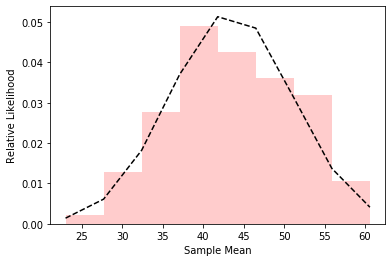

In [173]:
likelihoods, bin_edges, _  = plt.hist(sample_means, bins='auto', alpha=0.2, 
                                      color='r', density=True)
mean, std = stats.norm.fit(sample_means)
normal_likelihoods = stats.norm.pdf(bin_edges, mean, std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--')
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

The histogram’s shape still approximates a Normal distribution. We’ll print that distribution’s mean and compare it to the population mean.

**Listing 6. 22. Comparing Normal mean to population mean**

In [174]:
print(f"Actual population mean is approximately {population_mean:.2f}")
percent_diff_means = percent_diff(mean, population_mean)
print(f"There is a {percent_diff_means:.2f}% difference between means.")

Actual population mean is approximately 42.53
There is a 2.17% difference between means.


Our result, while not perfect, is still a very good approximation of the actual average age within the town. Now, we’ll briefly turn our attention to the standard deviation computed from the Normal distribution. We simply need to multiply the computed variance by sample size.

**Listing 6. 23. Estimating the population variance**

In [175]:
normal_variance = std ** 2
estimated_variance = normal_variance * sample_size

Let’s compare the estimated variance to the population variance.

**Listing 6. 24. Comparing estimated variance to population variance**

In [176]:
print(f"Estimated variance is approximately {estimated_variance:.2f}")
print(f"Actual population variance is approximately {population_variance:.2f}")
percent_diff_var = percent_diff(estimated_variance, population_variance)
print(f"There is a {percent_diff_var:.2f} percent difference between variances.")

Estimated variance is approximately 576.73
Actual population variance is approximately 584.33
There is a 1.30 percent difference between variances.


There is approximately a 1.3% difference between the estimated variance and the population variance. We've thus approximated the town's variance to a relative accurate degree, while only sampling 2% of the people living in the town.

## 6.3. Making Predictions Using Mean and Variance

Let us now consider a new scenario, in which we analyze a fifth grade classroom.  Mrs. Mann has spent 25 years teaching fifth-grade. Her classroom holds 20 students. Thus, over the years, she has taught 500 students total. Each of those students have taken an assessment exam upon the completion of her class. The mean and variance of their exam grades are 84 and 25, respectively. We'll refer to these values as the population mean an population variance, since they cover the entire population of students who've ever been taught by Mrs. Mann.

**Listing 6. 25. Population mean and variance of recorded grades**

In [177]:
population_mean = 84
population_variance = 25

Lets model the yearly test results of Mrs. Mann's class as a collection of 20 grades randomly drawn from a distribution with mean `population_mean` and variance `population variance`. According to Central Limit Theorem, the likelihood distribution of mean grades will resemble a Normal curve. The mean of the Normal curve will equal `population_mean`. The variance of the Normal curve will equal  the **SEM**. By definition, the SEM equals the population standard deviation divided by the square root of the sample size. We’ll compute the curve parameters, and plot the Normal curve below.

**Listing 6. 26. Plotting a Normal curve using mean and SEM**

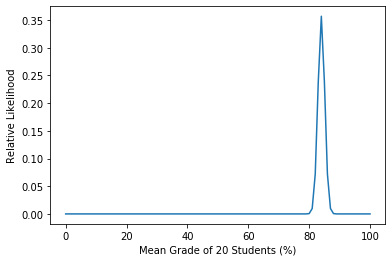

In [178]:
mean = population_mean
sem = (population_variance / 20) ** 0.5
grade_range = range(101)
normal_likelihoods = stats.norm.pdf(grade_range, mean, sem)
plt.plot(grade_range, normal_likelihoods)
plt.xlabel('Mean Grade of 20 Students (%)')
plt.ylabel('Relative Likelihood')
plt.show()

The area beneath the plotted curve approaches zero at values higher than 89%. 
Therefore, the probability of observing a mean grade that's at or above 90% is incredibly low. Still, to be sure, we'll need to somehow accurately measure the area under the Normal distribution.

### 6.3.1. Computing the Area Beneath a Normal Curve

We can estimate the area beneath a Normal curve by subdividing it into small, trapezoidal units. This ancient technique referred to as the **trapezoid rule**.  The trapezoid rule is very easy to execute in just a few lines of code. Alternatively, we can utilize NumPy's `np.trapz` method to take the area of an inputted array. Lets apply the trapezoid rule to our Normal distribution. 

**Listing 6. 27. Approximating the area using the trapezoid rule**

In [179]:
total_area = np.sum([normal_likelihoods[i: i + 2].sum() / 2
                    for i in range(normal_likelihoods.size - 1)])

assert total_area == np.trapz(normal_likelihoods)
print(f"Estimated area under the curve is {total_area}")

Estimated area under the curve is 1.0000000000384808


The estimated area is very close to 1.0, but its not exactly equal to 1.0. We can access a mathematically exact solution in SciPy, using the `stats.norm.sf` method. 

**Listing 6. 28. Computing the total area using SciPy**

In [180]:
assert stats.norm.sf(0, mean, sem) == 1.0

We expect `stats.norm.sf(mean, mean, sem)` to equal 0.5. This is because the mean perfectly splits the Normal curve into 2 equal halves. Meanwhile, we expect `np.trapz(normal_likelihoods[mean:])` to approximate but not fully equal 0.5. Lets confirm below.

**Listing 6. 29. Inputting the mean into the survival function**

In [181]:
assert stats.norm.sf(mean, mean, sem) == 0.5
estimated_area = np.trapz(normal_likelihoods[mean:])
print(f"Estimated area beyond the mean is {estimated_area}")

Estimated area beyond the mean is 0.5000000000192404


Now, lets execute stats.norm.sf(90, mean, sem). This will return the area over an interval of values lying beyond 90%. The area represents the likelihood of 20 students jointly acing an exam.

**Listing 6. 30. Computing the probability of a good collective grade**

In [182]:
area  = stats.norm.sf(90, mean, sem)
print(f"Probability of 20 students acing the exam is {area}")

Probability of 20 students acing the exam is 4.012555633463782e-08


# 7. Statistical Hypothesis Testing

## 7.1. Assessing the Divergence Between Sample Mean and Population Mean

Imagine a scenario where we analyze every fifth grade classroom in North Dakota. All fifth graders in the state are given an identical assessment exam. The exam grades are fed into a database. The population mean and variance of the grades are 80 and 100, respectively.

**Listing 7. 1. Population mean and variance of North Dakota's grades**

In [183]:
population_mean = 80
population_variance = 100

Now, suppose we travel to South Dakota. There, we find a class of 18 students that has outperformed North Dakota's population mean by 4 percentage points. If that high performance is just a random anomaly, then the **null hypothesis** is true. Let's temporarily assume that the null hypothesis is true, and that South Dakota's population mean is equal to North Dakota's population mean. Also, we'll assume that South Dakota's population variance is equal to North Dakota's population variance. Consequently, we can model our 18-student classroom as a random sample taken from a Normal distribution. That distribution's mean will equal `population_mean`. Meanwhile, its standard deviation will equal the SEM.

**Listing 7. 2. Normal curve parameters if the null hypothesis is true**

In [184]:
mean = population_mean
sem = (population_variance / 18) ** 0.5

If the null hypothesis is true, then the probability of encountering an average exam grade of at-least 84% is equal to `stats.norm.sf(84 mean, sem)`. We'll now print out that probability.

**Listing 7. 3. Finding the probability of a high-performance grade**

In [185]:
prob_high_grade = stats.norm.sf(84, mean, sem)
print(f"Probability of an average grade >= 84 is {prob_high_grade}")

Probability of an average grade >= 84 is 0.044843010885182284


We will now compute the probability of observing an exam-average that’s less than or equal to 76%. The calculation can be carried out with SciPy’s `stats.norm.cdf` method.

**Listing 7. 4. Finding the probability of a low-performance grade**

In [186]:
prob_low_grade = stats.norm.cdf(76, mean, sem)
print(f"Probability of an average grade <= 76 is {prob_low_grade}")

Probability of an average grade <= 76 is 0.044843010885182284


It appears that `prob_low_grade` is exactly equal to `prob_high_grade`. The cumulative distribution and the survival function are mirror images of each other. Thus, `stats.norm.sf(mean + x, mean, sem)` will always equal `stats.norm.cdf(mean - x, mean, sem)` for any input `x`. Below, we will demonstrate this symmetry. 

**Listing 7. 5. Comparing the survival and the cumulative distribution functions**

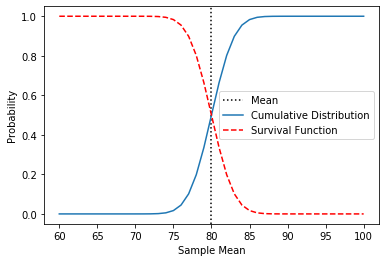

In [187]:
for x in range(-100, 100):
    sf_value = stats.norm.sf(mean + x, mean,  sem)
    assert sf_value == stats.norm.cdf(mean - x, mean, sem)

plt.axvline(mean, color='k', label='Mean', linestyle=':')
x_values = range(60, 101)
plt.plot(x_values, stats.norm.cdf(x_values, mean, sem), 
         label='Cumulative Distribution')
plt.plot(x_values, stats.norm.sf(x_values, mean, sem),
         label='Survival Function', linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.legend()
plt.show()

Conceptually, the sum of `prob_high_grade` and `prob_low_grade` represents the probability of observing an extreme deviation from the population mean when the null hypothesis is true. Statisticians refer to this null hypothesis-driven probability as the **p-value**.

**Listing 7. 6. Computing the null hypothesis driven p-value**

In [188]:
p_value = prob_low_grade + prob_high_grade
assert p_value == 2 * prob_high_grade
print(f"The p-value is {p_value}")

The p-value is 0.08968602177036457


What if the average of the South Dakotan class had equaled 85%, not 84%? Will that 1-percent shift influence our p-value output? Let’s find out.

**Listing 7. 7. Computing the p-value for an adjusted sample mean**

In [189]:
def compute_p_value(observed_mean, population_mean, sem):
    mean_diff = abs(population_mean - observed_mean)
    prob_high = stats.norm.sf(population_mean + mean_diff, population_mean, sem)
    return 2 * prob_high

new_p_value = compute_p_value(85, mean, sem)
print(f"The updated p-value is {new_p_value}")

The updated p-value is 0.03389485352468927


The new p-value is below 0.05. The threshold of 0.05 is called the **significance level**, and p-values below that threshold are deemed to be **statistically significant.** We'll temporarily set the significance level to a very stringent value of 0.001. What would be the minimum grade-average required to trigger this p-value threshold? Let's find out.

**Listing 7. 8. Scanning for a stringent p-value result**

In [190]:
for grade in range(80, 100):
    p_value = compute_p_value(grade, mean, sem)
    if p_value < 0.001:
        break

print(f"An average grade of {grade} leads to a p-value of {p_value}")

An average grade of 88 leads to a p-value of 0.0006885138966450773


Our lowering of the cutoff has inevitably exposed us to an increased risk of **type II** errors.
Consequently, in this book, we’ll maintain the commonly accepted p-value cutoff of 0.05.
However, we will also proceed with excessive caution in order to avoid erroneously
rejecting the null hypothesis.

## 7.2. Data Dredging: Coming to False Conclusions through Oversampling

Suppose that North Dakota's state-wide test performance does not diverge from the exam results in the other 49 states.  We travel to Montana,  and choose a random fifth-grade classroom of 18 students. We then compute the classroom's average grade. Since the null hypotheses is secretly true, we can simulate the value of that average grade by sampling from a Normal distribution defined by `mean` and `sem`.

**Listing 7. 9. Randomly sampling Montana’s exam performance**

In [191]:
np.random.seed(0)
random_average_grade = np.random.normal(mean, sem)
print(f"Average grade equals {random_average_grade:.2f}")

Average grade equals 84.16


The average exam grade in the class equaled approximately 84.16. We can determine if that average is statistically significant by checking if its p-value is less than or equal to 0.05.

**Listing 7. 10. Testing significance of Montana’s exam performance**

In [192]:
if compute_p_value(random_average_grade, mean, sem) <= 0.05:
    print("The observed result is statistically significant")
else:
    print("The observed result is not statistically significant")

The observed result is not statistically significant


The average-grade is not statistically significant. We will continue our journey. We'll visit a single 18-student classroom in each of the remaining 48 states. Once we discover a statistically significant p-value, our journey will end.

**Listing 7. 11. Randomly searching for a significant state result**

In [193]:
np.random.seed(0)
for i in range(1, 49):
    print(f"We visited state {i + 1}")
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= 0.05:
        print("We found a statistically significant result.")
        print(f"The average grade was {random_average_grade:.2f}")
        print(f"The p-value was {p_value}")
        break

if i == 48:
    print("We visited every state and found no significant results.")


We visited state 2
We visited state 3
We visited state 4
We visited state 5
We found a statistically significant result.
The average grade was 85.28
The p-value was 0.025032993883401307


The fifth state that we visited produced a statistically significant result However, our conclusions are erroneous. We have indulged in the cardinal statistical sin of **data dredging**. In data-dredging, experiments are repeated over and over again, until a statistically significant result is found. 

Avoiding data dredging is not difficult. We must simply choose in advance a finite number of experiments to run. Afterwards, we should set our significance level to 0.05 divided by the planned experiment count. This simple technique is known as the **Bonferonni correction**. Let's repeat our analysis of US exam performance using the Bonferonni correction. We'll start by adjusting the significance level.

**Listing 7. 12. Using the Bonferonni correction to adjust significance**

In [194]:
num_planned_experiments = 49
significance_level = .05 / num_planned_experiments

We’ll proceed to re-run our previous analysis. The analysis will terminate if we encounter a
p-value that’s less than or equal to significance_level.

**Listing 7. 13. Re-running an analysis using an adjusted significance level**

In [195]:
np.random.seed(0)
for i in range(49):
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= significance_level:
        print("We found a statistically significant result.")
        print(f"The average grade was {random_average_grade:.2f}")
        print(f"The p-value was {p_value}")
        break

if i == 48:
    print("We visited every state and found no significant results.")

We visited every state and found no significant results.


## 7.3. Bootstrapping with Replacement: Testing a Hypothesis When the

Consider the following scenario, in which we own a very large aquarium. It holds 20 tropical fish of varying lengths. The fish lengths range from 2 cm to nearly 120 cm. The average fish-length equals 27 cm. We'll represent these fish lengths using the `fish_length` array below.

**Listing 7. 14. Defining lengths of fish in an aquarium**

In [196]:
fish_lengths = np.array([46.7, 17.1, 2.0, 19.2, 7.9, 15.0, 43.4, 
                         8.8, 47.8, 19.5, 2.9, 53.0, 23.5, 118.5, 
                         3.8, 2.9, 53.9, 23.9, 2.0, 28.2])
assert fish_lengths.mean() == 27

The population mean-length of wild, tropical fish equals 37 cm. There is a sizable 10 cm difference between the population mean and our sample mean. Is that difference statistically significant? We would like to find out, but we don't have a population variance. Thus, we can't compute the SEM. So what should we do? Well, we can implement a technique known as **Bootstrapping with Replacement**. We'll begin the Bootstrapping procedure by removing a random fish from the aquarium, and subsequently measuring its length. 

**Listing 7. 15. Sampling a random fish from the aquarium**

In [197]:
np.random.seed(0)
random_fish_length = np.random.choice(fish_lengths, size=1)[0]
sampled_fish_lengths = [random_fish_length]

Now, we will place the chosen fish back into the aquarium. Afterwards, we'll repeat the sampling procedure 19 more times until 20 random fish-lengths have been measured.

**Listing 7. 16. Sampling 20 random fish with repetition**

In [198]:
np.random.seed(0)
for _ in range(20):
    random_fish_length = np.random.choice(fish_lengths, size=1)[0]
    sampled_fish_lengths.append(random_fish_length)

The `sampled_fish_lengths` list contains 20 measurements. However, the elements of `fish_lengths` and `sampled_fish_lengths` are not identical. Due to random sampling, the mean values of the array and list are likely to differ.

**Listing 7. 17. Comparing the sample mean to the aquariuam mean**

In [199]:
sample_mean = np.mean(sampled_fish_lengths)
print(f"Mean of sampled fish-lengths is {sample_mean:.2f} cm")

Mean of sampled fish-lengths is 26.03 cm


If we sample another 20 measurements from the aquarium, we can expect the resulting sample mean to also deviate from 27 cm. Let’s confirm this by repeating our sampling using a single line of code; `np.random.choice(fish_lengths, size=20, replace=True)`.

**Listing 7. 18. Sampling with replacement using NumPy**

In [200]:
new_sampled_fish_lengths = np.random.choice(fish_lengths, size=20, 
                                            replace=True)
new_sample_mean = new_sampled_fish_lengths.mean()
print(f"Mean of the new sampled fish-lengths is {sample_mean:.2f} cm")

Mean of the new sampled fish-lengths is 26.03 cm


Our sampled mean-values are randomly distributed Let’s explore the shape of this random distribution by repeating our sampling process 150,000 times.

**Listing 7. 19. Plotting the distribution of 150k sampled means**

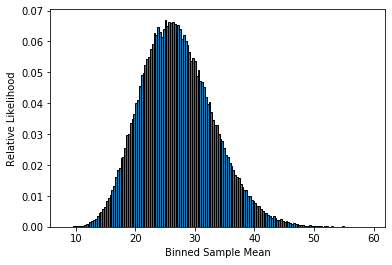

In [201]:
np.random.seed(0)
sample_means = [np.random.choice(fish_lengths, 
                                size=20,
                                replace=True).mean()
               for _ in range(150000)]
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', 
                                      edgecolor='black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

The histogram's shape is not symmetric, its left side rises steeper than its right side. Mathematicians refer to this asymmetry as a skew. We can confirm the skew within our histogram, by calling `stats.skew(sample_means))`.

**Listing 7. 20. Computing the skew of an asymmetric distribution**

In [202]:
assert abs(stats.skew(sample_means)) > 0.4 

Our asymmetric histogram cannot be modeled using a Normal distribution. Instead, we can fit the histogram to a generic distribution using `stats.rv_histogram`. The method will return a `random_variable` SciPy object. The object will contain `pdf`, and `cdf`, and `sf` methods, just like `stats.norm.` Lets plot `random_variable.pdf(bin_edges)`.

**Listing 7. 21. Fitting to data to a generic distribution using SciPy**

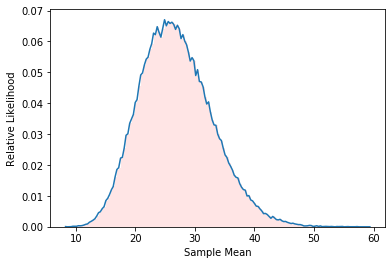

In [203]:
random_variable = stats.rv_histogram((likelihoods, bin_edges))
plt.plot(bin_edges, random_variable.pdf(bin_edges))
plt.hist(sample_means, bins='auto', alpha=0.1,  color='r', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

As expected, the probability density function perfectly resembles the histogram shape. Let’s now plot both the cumulative distribution function and the survival function associated with `random_variable`.

**Listing 7. 22. Plotting mean and interval-areas for a generic distribution**

Mean of the distribution is approximately 27.00 cm


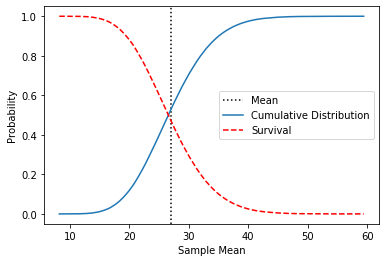

In [204]:
rv_mean = random_variable.mean()
print(f"Mean of the distribution is approximately {rv_mean:.2f} cm")

plt.axvline(random_variable.mean(), color='k', label='Mean', linestyle=':')
plt.plot(bin_edges, random_variable.cdf(bin_edges), 
         label='Cumulative Distribution')
plt.plot(bin_edges, random_variable.sf(bin_edges),
         label='Survival', linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.legend()
plt.show()

What is probability that 20 fish sampled with replacement produce a mean as extreme as the population mean? Extremeness is defined as a sampled output that's at-least 10 cm away from 27. Summing `random_variable.sf(37)` and `random_variable.cdf(17)` will give us our answer.

**Listing 7. 23. Computing the probability of an extreme sample mean**

In [205]:
prob_extreme= random_variable.sf(37) + random_variable.cdf(17)
print(f"Probability of observing an extreme sample mean is approximately {prob_extreme:.2f}")

Probability of observing an extreme sample mean is approximately 0.10


It has been shown that sampling with replacement approximates a dataset's SEM Thus, if the null hypothesis is true, then our missing SEM is equal to `random_variable.std`. This give us yet another way of computing the p-value.

**Listing 7. 24. Using Bootstrapping to estimate the SEM**

In [206]:
estimated_sem = random_variable.std()
p_value = compute_p_value(27, 37, estimated_sem)
print(f"P-value computed from estimated SEM is approximately {p_value:.2f}")

P-value computed from estimated SEM is approximately 0.10


Furthermore, we can estimate the p-value simply by computing the frequency of extreme observations.

**Listing 7. 25. Computing the  p-value from direct counts**

In [207]:
number_extreme_values = 0
for sample_mean in sample_means:
    if not 17 < sample_mean < 37:
        number_extreme_values += 1

p_value =  number_extreme_values / len(sample_means)
print(f"P-value is approximately {p_value:.2f}")

P-value is approximately 0.10


Bootstrapping with Replacement presupposes the knowledge of a population mean. Unfortunately, in real-life situations, the population mean is rarely known. In the next section, we learn how to compare collected samples when both the population mean and the population variance are unknown.

## 7.4. Permutation Testing: Comparing Means of Samples when the Population Parameters are Unknown

Suppose our neighbor also owns an aquarium. Her aquarium contains 10 fish, whose average length is 46 cm. We’ll represent these new fish-lengths using the `new_fish_length array` below.

**Listing 7. 26. Defining lengths of fish in a new aquarium**

In [208]:
new_fish_lengths = np.array([51, 46.5, 51.6, 47, 54.4, 40.5, 43, 43.1, 
                             35.9, 47.0])
assert new_fish_lengths.mean() == 46

We want to compare the contents of our neighbor’s aquarium with our own. We’ll begin by
measuring the difference between `new_fish_length.mean()` and
`fish_length.mean()`.

**Listing 7. 27. Computing difference between 2 sample means**

In [209]:
mean_diff = abs(new_fish_lengths.mean() - fish_lengths.mean())
print(f"There is a {mean_diff:.2f} cm difference between the two means")

There is a 19.00 cm difference between the two means


We will now to carry out a **Permutation test**, where `mean_diff` is leveraged to compute statistical significance. We'll begin the Permutation test by placing all 30 fish into a single aquarium. The unification of our fish can be modeled using the `np.hstack` method.

**Listing 7. 28. Merging 2 arrays using `np.haystack`**

In [210]:
total_fish_lengths = np.hstack([fish_lengths, new_fish_lengths])
assert total_fish_lengths.size == 30

Once the fish are grouped together, we will allow them to swim in random directions. We’ll use the `np.random.shuffle` method to shuffle the positions of the fish.

**Listing 7. 29. Shuffling the positions of merged fish**

In [211]:
np.random.seed(0)
np.random.shuffle(total_fish_lengths)

Now, we'll choose 20 of our randomly shuffled fish, and place them in a separate aquarium. Once more, we'll have 20 fish in aquarium A and 10 fish in aquarium B. However, the mean-lengths of the fish in each aquarium will probably differ from `fish_lengths.mean(`) and `new_fish_lengths.mean()`. Consequently, the difference between mean fish-lengths will also change.

**Listing 7. 30. Computing difference between 2 random sample means**

In [212]:
random_20_fish_lengths = total_fish_lengths[:20]
random_10_fish_lengths = total_fish_lengths[20:]
mean_diff = random_20_fish_lengths.mean() - random_10_fish_lengths.mean() 
print(f"The sampled difference between mean fish lengths is {mean_diff}")

The sampled difference between mean fish lengths is 14.329999999999998


Not surprisingly, `mean_diff` is fluctuating random variable. We therefore can proceed to find
its distribution through random sampling. Below, will repeat our fish-shuffling procedure
30,000 times in order to obtain a histogram of `mean_diff` values.

**Listing 7. 31. Plotting the distribution of the fluctuating difference between means**

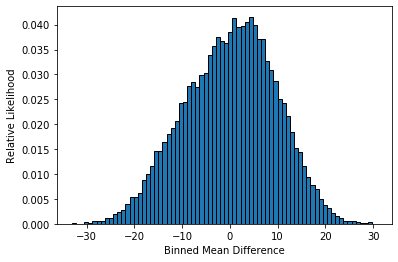

In [213]:
np.random.seed(0)
mean_diffs = []
for _ in range(30000):
    np.random.shuffle(total_fish_lengths)
    mean_diff = total_fish_lengths[:20].mean() - total_fish_lengths[20:].mean()
    mean_diffs.append(mean_diff)
    
likelihoods, bin_edges, _ = plt.hist(mean_diffs, bins='auto', 
                                      edgecolor='black', density=True)
plt.xlabel('Binned Mean Difference')
plt.ylabel('Relative Likelihood')
plt.show()

Next, we will fit the histogram to a random variable using the `stats.rv_hist` method.

**Listing 7. 32. Fitting the histogram to a random variable**

In [214]:
random_variable = stats.rv_histogram((likelihoods, bin_edges))

We want to know the probability of observing an extreme value when the null hypothesis is true.
We’ll define extremeness as a difference between means whose absolute value is at-least 19
cm. Thus, our p-value will equal `random_variable.cdf(-19) + random_variable.sf(19)`.

**Listing 7. 33. Computing the Permutation p-value**

In [215]:
p_value = random_variable.sf(19) + random_variable.cdf(-19)
print(f"P-value is approximately {p_value:.2f}")

P-value is approximately 0.04


As an aside, we can simplify our Permutation test by leveraging the Law of Large Numbers. We simply need to compute the frequency of extreme recorded samples, just like we did with Bootstrapping with Replacement.

**Listing 7. 34. Computing the Permutation p-value from direct counts**

In [216]:
number_extreme_values = 0.0
for min_diff in mean_diffs:
    if not -19 < min_diff < 19:
        number_extreme_values += 1

p_value =  number_extreme_values / len(mean_diffs)
print(f"P-value is approximately {p_value:.2f}")

P-value is approximately 0.04


# 8. Analyzing Tables Using Pandas

## 8.1. Storing Tables Using Basic Python

Let's define a sample table in Python. The table will store measurements for various species of fish. The measurements will cover both length and width, in centimeters. We'll represent this table as a dictionary. 

**Listing 8. 1. Storing a table using Python data-structures**

In [1]:
fish_measures = {'Fish': ['Angelfish', 'Zebrafish', 'Killifish', 'Swordtail'],
                 'Length':[15.2, 6.5, 9, 6],
                 'Width': [7.7, 2.1, 4.5, 2]}

Suppose we want to know the length of a zebrafish. To obtain the length, we must first access the index of the `'Zebrafish'` element in `fish_measures['Fish']`. Afterwards, we'll need to check index in `fish_measures['Length']`.

**Listing 8. 2. Accessing table columns using a dictionary**

In [3]:
zebrafish_index = fish_measures['Fish'].index('Zebrafish')
zebrafish_length = fish_measures['Length'][zebrafish_index]
print(f"The length of a zebrafish is {zebrafish_length:.2f} cm")

The length of a zebrafish is 6.50 cm


Our dictionary representation is functional, but is also difficult to use. A better solution is to use the  external Pandas library.

# 8.2. Exploring Tables Using Pandas

We'll proceed to install the Pandas library. Once Pandas is installed, we will import it as `pd`, using common Pandas usage convention.

**Listing 8. 3. Importing the Pandas library**

In [219]:
import pandas as pd

We’ll now load our fish_measures tables into Pandas. This can be done by calling `pd.DataFrame(fish_measures)`.

**Listing 8. 4. Loading a table into Pandas**

In [220]:
df = pd.DataFrame(fish_measures)
print(df)

        Fish  Length  Width
0  Angelfish    15.2    7.7
1  Zebrafish     6.5    2.1
2  Killifish     9.0    4.5
3  Swordtail     6.0    2.0


The complete table contents are visible in the printed output. For larger tables, we might prefer to only print the first few rows. Calling `print(df.head(x))` will print out just the first `x` rows within a table.

**Listing 8. 5. Accessing the first 2 rows of a table**

In [221]:
print(df.head(2))

        Fish  Length  Width
0  Angelfish    15.2    7.7
1  Zebrafish     6.5    2.1


Sometimes, the best way to summarize a larger Pandas table is to execute the `pandas.describe()` method. By default, the method will generate statistics for all numeric columns within the table.

**Listing 8. 6. Summarizing the numeric columns**

In [222]:
print(df.describe())

          Length     Width
count   4.000000  4.000000
mean    9.175000  4.075000
std     4.225616  2.678775
min     6.000000  2.000000
25%     6.375000  2.075000
50%     7.750000  3.300000
75%    10.550000  5.300000
max    15.200000  7.700000


Myriad statistical information is included in the output. Sometimes, the extra information is not very useful. If all we care about is the mean, then we can omit all other outputs by calling `df.mean()`.

**Listing 8. 7. Computing the column mean**

In [223]:
print(df.mean())

Length    9.175
Width     4.075
dtype: float64


The `df.describe()` method is primarily intended to be executed on numeric columns. However, we can force it to process strings by calling `df.describe(include=[np.object])`.

**Listing 8. 8. Summarizing the string columns**

In [224]:
print(df.describe(include=[np.object]))

             Fish
count           4
unique          4
top     Killifish
freq            1


Pandas stores all data in NumPy for quick manipulation. We can easily retrieve the underlying NumPy array by accessing `df.values`.

**Listing 8. 9. Retrieving the table as a 2D NumPy array**

== 8.3. Retrieving Table Columns
Let’s turn our attention to retrieving individual columns. The columns can be accessed using their column names. We can output all possible column names by calling `print(df.columns)`.

**Listing 8. 10. Accessing all column names**

In [225]:
print(df.columns)

Index(['Fish', 'Length', 'Width'], dtype='object')


Now let’s print all data stored in the column Fish. We’ll do this by accessing `df.Fish`.

**Listing 8. 11. Accessing an individual column**

In [226]:
print(df.Fish)

0    Angelfish
1    Zebrafish
2    Killifish
3    Swordtail
Name: Fish, dtype: object


Please note that the printed output is not a NumPy array. In order to print a NumPy array, we must run `print(df.Fish.values)`.

**Listing 8. 12. Retrieving a column as a NumPy array**

In [227]:
print(df.Fish.values)
assert type(df.Fish.values) == np.ndarray

['Angelfish' 'Zebrafish' 'Killifish' 'Swordtail']


We can also access Fish using a  dictionary-style bracket representation. Below, we’ll print `df['Fish']`.

**Listing 8. 13. Accessing a column using brackets**

In [228]:
print(df['Fish'])

0    Angelfish
1    Zebrafish
2    Killifish
3    Swordtail
Name: Fish, dtype: object


The bracket representation allows us to retrieve multiple columns at once. If we wish to retrieve multiple columns, we simply execute `df[name_list]`, where name_list represents a list of column names.

**Listing 8. 14. Accessing multiple column using brackets**

In [229]:
print(df[['Fish', 'Length']])

        Fish  Length
0  Angelfish    15.2
1  Zebrafish     6.5
2  Killifish     9.0
3  Swordtail     6.0


We can analyze data stored within df in variety of useful ways. We could, for instance, sort our rows based on a value of single column.

**Listing 8. 15. Sorting rows by column value**

In [230]:
print(df.sort_values('Length'))

        Fish  Length  Width
3  Swordtail     6.0    2.0
1  Zebrafish     6.5    2.1
2  Killifish     9.0    4.5
0  Angelfish    15.2    7.7


Furthermore, we can leverage values within columns to filter out unwanted rows. For example, calling `df[df.Width >= 3]` will return a table whose rows contain a width of at-least 3 cm.

**Listing 8. 16. Filtering rows by column value**

In [231]:
print(df[df.Width >= 3])

        Fish  Length  Width
0  Angelfish    15.2    7.7
2  Killifish     9.0    4.5


## 8.4. Retrieving Table Rows

Unlike columns, our rows do not have preassigned label values. To compensate, Pandas assigns a special index value for each row. The index for the Angelfish row is 0, and the index for the Swordtail row is 3. We can access these rows by calling `df.loc[[0, 3]]`.

**Listing 8. 17. Accessing rows by index**

In [232]:
print(df.loc[[0, 3]])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


Suppose we want to retrieve those rows whose Fish column contains either `'Angelfish'` or `'Swordtail'`. We need to execute `df[booleans']`, where `booleans` is list of `True` or `False` values that are `True` if they match a row of interest. How do we obtain the `booleans` list? One naïve approach is to iterate over `df.Fish`, returning `True` if a column-value appears in `['Angelfish', 'Swordtail']`. 

**Listing 8. 18. Accessing rows by column value**

In [233]:
booleans = [name in ['Angelfish', 'Swordtail']
            for name in df.Fish]
print(df[booleans])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


We can more concisely locate these rows by leveraging the Pandas `isin` method. Calling `df.Fish.isin(['Angelfish', Swordtail'])`will return an analogue of our previously computed `booleans` list.

**Listing 8. 19. Accessing rows by column value using `isin`**

In [234]:
print(df[df.Fish.isin(['Angelfish', 'Swordtail'])])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


Let's remedy replace the row indices with species. We'll swap numbers for species-names using the `df.set_index` method.

**Listing 8. 20. Swapping row indices for column values**

In [235]:
df.set_index('Fish', inplace=True)
print(df)

           Length  Width
Fish                    
Angelfish    15.2    7.7
Zebrafish     6.5    2.1
Killifish     9.0    4.5
Swordtail     6.0    2.0


The left-most index column is no longer numeric. It has been replaced with species-names. We can now access the Angelfish and Swordtail columns by running `df.loc[['Angelfish', 'Swordtail']`.

**Listing 8. 21. Accessing rows by string index**

In [236]:
print(df.loc[['Angelfish', 'Swordtail']])

           Length  Width
Fish                    
Angelfish    15.2    7.7
Swordtail     6.0    2.0


## 8.5. Modifying Table Rows and Columns

What will happen if we swap our rows and columns? We can find out by running `df.T`. The T stands for **transpose**. In a transpose operation, the elements of a table are flipped around its diagonal so that the rows and columns are switched.

**Listing 8. 22. Swapping rows and columns**

In [237]:
df_transposed = df.T
print(df_transposed)

Fish    Angelfish  Zebrafish  Killifish  Swordtail
Length       15.2        6.5        9.0        6.0
Width         7.7        2.1        4.5        2.0


Each column now refers to an individual species of fish. Meanwhile, each row refers to a particular measurement type. Thus, calling `print(df_transposed.Swordtail)` will print out the swordtail’s length and width.

**Listing 8. 23. Printing a transposed column**

In [238]:
print(df_transposed.Swordtail)

Length    6.0
Width     2.0
Name: Swordtail, dtype: float64


Let's try to modify our transposed table. We'll add the measurements of a clownfish to `df_transposed` by running `df_transposed['Clownfish'] = [10.6, 3.7]`.

**Listing 8. 24. Adding a new column**

In [239]:
df_transposed['Clownfish'] = [10.6, 3.7]
print(df_transposed)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length       15.2        6.5        9.0        6.0       10.6
Width         7.7        2.1        4.5        2.0        3.7


Alternatively, we can assign new columns using the `df_transposed.assign` method. The method lets us add multiple columns by passing in more than one column name.

**Listing 8. 25. Adding multiple new columns**

In [240]:
df_new = df_transposed.assign(Clownfish2=[10.6, 3.7], Clownfish3=[10.6, 3.7])
assert 'Clownfish2' not in df_transposed.columns
assert 'Clownfish2' in df_new.columns
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish  Clownfish2  \
Length       15.2        6.5        9.0        6.0       10.6        10.6   
Width         7.7        2.1        4.5        2.0        3.7         3.7   

Fish    Clownfish3  
Length        10.6  
Width          3.7  


Our newly added columns are redundant. We'll delete these columns by calling `df_new.drop(columns=['Clownfish2', 'Clownfish3'], inplace=True)`.

**Listing 8. 26. Deleting multiple columns**

In [241]:
df_new.drop(columns=['Clownfish2', 'Clownfish3'], inplace=True)
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length       15.2        6.5        9.0        6.0       10.6
Width         7.7        2.1        4.5        2.0        3.7


Lets utilize our stored measurements in order to compute the surface area of each fish. To find the areas, we must iterate over the values in every column, by executing `df_new.items()`. 

**Listing 8. 27. Iterating over column values**

In [242]:
areas = []
for fish_species, (length, width) in df_new.items():
    area = math.pi * length * width / 4
    print(f"Area of {fish_species} is {area}")
    areas.append(area)

Area of Angelfish is 91.92300104403735
Area of Zebrafish is 10.720684930375171
Area of Killifish is 31.808625617596654
Area of Swordtail is 9.42477796076938
Area of Clownfish is 30.80331596844792


Let's add the computed areas to our table. We can augment a new Area row by executing `df_new.loc['Area'] = areas`. Afterwards, we'll need to run `df_new.reindex()` to update the row indices with the added Area name.

**Listing 8. 28. Adding a new row**

In [243]:
df_new.loc['Area'] = areas
df_new.reindex()
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length  15.200000   6.500000   9.000000   6.000000  10.600000
Width    7.700000   2.100000   4.500000   2.000000   3.700000
Area    91.923001  10.720685  31.808626   9.424778  30.803316


In [244]:
row_count, column_count = df_new.shape
print(f"Our table contains {row_count} rows and {column_count} columns")

Our table contains 3 rows and 5 columns


Our updated table contains 3 rows and 5 columns. We can confirm this using `df_new.shape`.

**Listing 8. 29. Checking table shape**

In [245]:
df_new.to_csv('Fish_measurements.csv')
with open('Fish_measurements.csv') as f:
    print(f.read())

,Angelfish,Zebrafish,Killifish,Swordtail,Clownfish
Length,15.2,6.5,9.0,6.0,10.6
Width,7.7,2.1,4.5,2.0,3.7
Area,91.92300104403735,10.720684930375171,31.808625617596654,9.42477796076938,30.80331596844792



## Saving and Loading Table Data
We've finished making changes to the table. Let's store the table for later use. Calling `df_new.to_csv('Fish_measurements.csv')` will save the table to a CSV file.

**Listing 8. 30. Saving a table to a CSV file**

The CSV file can be loaded into Pandas using the `pd.read_csv` method. Calling `pd.read_csv('Fish_measurements.csv', index_col=0)` will return a data frame containing all our table information. The optional `index_col` parameter will specify which column holds the row-index names

**Listing 8. 31. Loading a table from a CSV file**

In [246]:
df = pd.read_csv('Fish_measurements.csv', index_col=0)
print(df)
print("\nRow index names when column is assigned:")
print(df.index.values)

df_no_assign = pd.read_csv('Fish_measurements.csv')
print("\nRow index names when no column is assigned:")
print(df_no_assign.index.values)

        Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length  15.200000   6.500000   9.000000   6.000000  10.600000
Width    7.700000   2.100000   4.500000   2.000000   3.700000
Area    91.923001  10.720685  31.808626   9.424778  30.803316

Row index names when column is assigned:
['Length' 'Width' 'Area']

Row index names when no column is assigned:
[0 1 2]


## 8.7. Visualizing Tables Using Seaborn

Some numeric tables are too large to be viewed as printed output. Such tables are more easily displayed using heatmaps. A **heatmap** is graphical representation of a table, in which numeric cells are colored by value.  The easiest way to create a heatmap is to use the external Seaborn library. Lets now install Seaborn, and import it as `sns`.

**Listing 8. 32. Importing the Seaborn library**

In [247]:
import seaborn as sns

Now, we’ll visualize our data frame as heatmap by calling sns.heatmap(df).

**Listing 8. 33. Visualizing a heatmap using Seaborn**

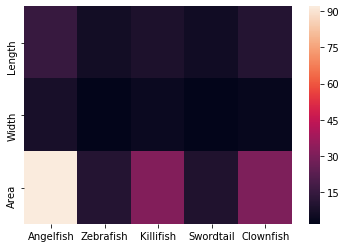

In [248]:
sns.heatmap(df)
plt.show()

We can alter that color-pallet within the heatmap plot by passing in a `cmap` parameter. Below, we'll execute `sns.heatmap(df, cmap='YlGnBu')`. This will create a heatmap where the color-shades transition from yellow to green, and then to blue.

**Listing 8. 34. Adjusting heatmap colors**

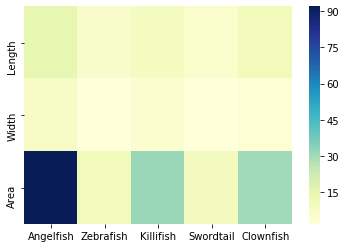

In [249]:
sns.heatmap(df, cmap='YlGnBu')
plt.show()

Within the updated heatmap, the color-tones have flipped. Now, lighter colors correspond to higher measurements. We can confirm this by annotating the plot with the actual measurement values. 

**Listing 8. 35. Annotating the heatmap**

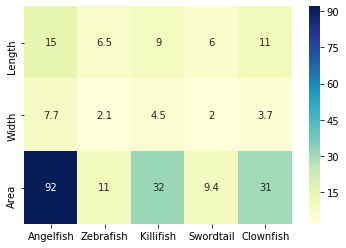

In [250]:
sns.heatmap(df, cmap='YlGnBu', annot=True)
plt.show()

The Seaborn library is built on top of Matplotlib. Consequently, we can use Matplotlib commands to modify elements of the heatmapt. For example, calling `plt.yticks(rotation=0)` will rotate the y-axis measurement labels. 

**Listing 8. 36. Rotating heatmap labels using Matplotlib**

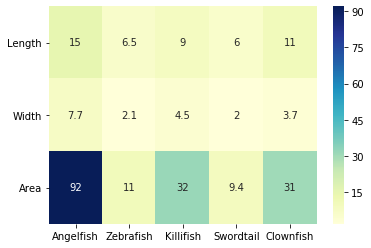

In [251]:
sns.heatmap(df, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)
plt.show()

Finally, we should note that running `sns.heatmap(df.values)` will also create a heatmap plot. However, the y-axis and x-axis labels will be missing from that plot. In order to specify the labels, we will need to set the  `xticklabels` and `yticklabels` parameters within  the `sns.heatmap` method.

**Listing 8. 37. Visualizing a heatmap from a NumPy array**

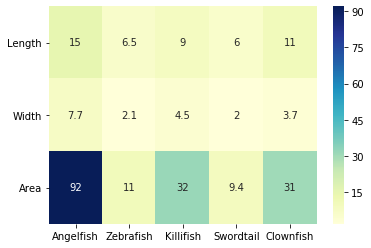

In [252]:
sns.heatmap(df.values, 
            cmap='YlGnBu', annot=True,
            xticklabels=df.columns,
            yticklabels=df.index)
plt.yticks(rotation=0)
plt.show()

# 9. Case Study 2 Solution

## 9.1. Overview

Our advertising data-table monitors ad-clicks across 30 different colors. We aim is to discover an ad-color that generates significantly more clicks than blue.

## 9.2. Processing the Ad-Click Table in Pandas
Let’s begin by loading our ad-click table into Pandas. Afterwards, we’ll check the number of rows and columns in the table.

**Listing 9. 1. Loading ad-click table into Pandas**

In [253]:
df = pd.read_csv('colored_ad_click_table.csv')
num_rows, num_cols = df.shape
print(f"Table contains {num_rows} rows and {num_cols} columns")

Table contains 30 rows and 41 columns


Our table contains 30 rows and 41 columns. The rows should correspond to clicks-per-day and views-per-day associated with individual colors. Let’s confirm by checking the column names.

**Listing 9. 2. Checking column names**

In [254]:
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

The columns are consistent with our expectations. As a sanity check, let’s examine the quality of data stored within our table. We’ll start by outputting the analyzed color-names.

**Listing 9. 3. Checking color names**

In [255]:
print(df.Color.values)

['Pink' 'Gray' 'Sapphire' 'Purple' 'Coral' 'Olive' 'Navy' 'Maroon' 'Teal'
 'Cyan' 'Orange' 'Black' 'Tan' 'Red' 'Blue' 'Brown' 'Turquoise' 'Indigo'
 'Gold' 'Jade' 'Ultramarine' 'Yellow' 'Virdian' 'Violet' 'Green'
 'Aquamarine' 'Magenta' 'Silver' 'Bronze' 'Lime']


30 common colors are present in the Color column. We can confirm that the color blue is present by executing `assert
'Blue' in df.Color`.

**Listing 9. 4. Checking for blue color**

In [256]:
assert 'Blue' in df.Color.values

Let's examine columns for the first day of the experiment; __Click Count: Day 1 __and __View Count: Day 1__. We'll select these 2 columns and use `describe()` to summarize their contents.

**Listing 9. 5. Summarizing Day 1 of the experiment**

In [257]:
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1']
print(df[selected_columns].describe())

       Click Count: Day 1  View Count: Day 1
count           30.000000               30.0
mean            23.533333              100.0
std              7.454382                0.0
min             12.000000              100.0
25%             19.250000              100.0
50%             24.000000              100.0
75%             26.750000              100.0
max             49.000000              100.0


The minimum and maximum values in _View Count: Day 1_ are both equal to 100 views. This behavior is expected. We had been specifically informed that each color receives 100 daily views. Let's confirm that all the daily views equal 100.

**Listing 9. 6. Confirming equivalent daily views**

In [258]:
view_columns = [column for column in df.columns if 'View' in column]
assert np.all(df[view_columns].values == 100) 

All view-counts equal 100. Therefore, all 20 _View Count_ columns are redundant. We can delete them from our table.

**Listing 9. 7. Deleting view-counts from the table**

In [259]:
df.drop(columns=view_columns, inplace=True)
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')


Our remaining 20 _Click Count_ columns correspond to number of clicks per 100 daily views. We can treat these counts as percentages. Let's summarize the percentage of daily ad-clicks for blue ads. 

**Listing 9. 8. Summarizing daily blue-click statistics**

In [260]:
df.set_index('Color', inplace=True)
print(df.T.Blue.describe())

count    20.000000
mean     28.350000
std       5.499043
min      18.000000
25%      25.750000
50%      27.500000
75%      30.250000
max      42.000000
Name: Blue, dtype: float64


On average, 28.35% of blue ads receive a click per every view. How does this average compare to the other 29 colors? We are ready to find out.

## 9.3. Computing P-values from Differences in Means

Let’s start by filtering the data. We’ll delete blue, leaving behind the other 29 colors. Afterwards, we’ll transpose our table in order to access colors by column name.

**Listing 9. 9. Creating a non-blue table**

In [261]:
df_not_blue = df.T.drop(columns='Blue')
print(df_not_blue.head(2))

Color               Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon  \
Click Count: Day 1    21    27        30      26     26     26    38      21   
Click Count: Day 2    20    27        32      21     24     19    29      29   

Color               Teal  Cyan  ...  Ultramarine  Yellow  Virdian  Violet  \
Click Count: Day 1    25    24  ...           49      14       27      15   
Click Count: Day 2    25    22  ...           41      24       23      22   

Color               Green  Aquamarine  Magenta  Silver  Bronze  Lime  
Click Count: Day 1     14          24       18      26      19    20  
Click Count: Day 2     25          28       21      24      19    19  

[2 rows x 29 columns]


Our `df_not_blue` table contains the percent-clicks for 29 colors. We would like to compare these percentages to our blue percentages. Our best option is to run a Permutation test. In order to run the test, we will need to define a reusable Permutation test function.

**Listing 9. 10. Defining a Permutation test function**

In [262]:
def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b)
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() - sample_b.mean())  >= extreme_mean_diff:
            number_extreme_values += 1

    p_value = number_extreme_values / 30000
    return p_value

We’ll run a Permutation test between blue and the other 29 colors. Afterwards, we’ll sort these colors based on their p-value results. Our outputs will be visualized as heatmap, to better emphasize the differences between p-values.

**Listing 9. 11. Running a Permutation test across colors**

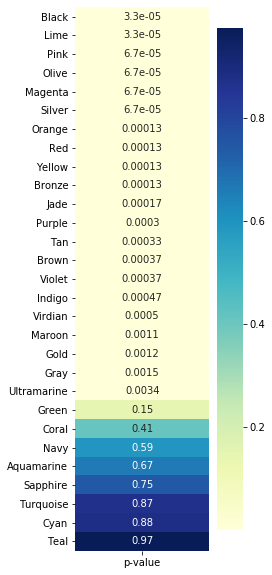

In [263]:
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks)
    color_to_p_value[color] = p_value

sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(), 
                                             key=lambda x: x[1]))
plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values],
            cmap='YlGnBu', annot=True, xticklabels=['p-value'],
            yticklabels=sorted_colors)
plt.show()

The majority of colors generate a p-value that is noticeably lower than 0.05. Black has the lowest p-value.  What exactly is the difference between recorded clicks for black and blue? We can find by printing `df_not_blue.Black.mean()`.

**Listing 9. 12. Finding the mean click-rate of black.**

In [264]:
mean_black = df_not_blue.Black.mean()
print(f"Mean click-rate of black is {mean_black}")

Mean click-rate of black is 21.6


The mean click-rate of black is 21.6. This value is prominently lower than the blue mean of 28.35.  Let's filter out those colors whose mean is less than the mean of blue. 

**Listing 9. 13. Filtering colors with inferior click-rates**

In [265]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
size = remaining_colors.size
print(f"{size} colors have on average more clicks than Blue.")
print("These colors are:")
print(remaining_colors.values)

5 colors have on average more clicks than Blue.
These colors are:
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


Only 5 colors remain. Each of these colors is a different shade of blue. Let’s print the sorted p-values for the 5 remaining colors. We’ll also print the mean-clicks, for easier analysis.

**Listing 9. 14. Printing the 5 remaining colors**

In [266]:
for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
    if color in remaining_colors:
        mean = df_not_blue[color].mean()
        print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Ultramarine has a p-value of 0.0034 and a mean of 34.2
Navy has a p-value of 0.5911666666666666 and a mean of 29.3
Aquamarine has a p-value of 0.6654666666666667 and a mean of 29.2
Sapphire has a p-value of 0.7457666666666667 and a mean of 28.9
Teal has a p-value of 0.9745 and a mean of 28.45


## 9.4. Determining Statistical Significance

Only one remaining color has a p-value that's small. That color is ultramarine; a special shade of blue. Ultramarine's p-value is 0.0034. Is that p-value statistically significant? To find out, we need to execute a Bonferonni correction. Otherwise, we will fall victim to p-value hacking.

**Listing 9. 15. Applying the Bonferonni correction**

In [267]:
significance_level = 0.05 / 29
print(f"Adjusted significance level is {significance_level}")
if color_to_p_value['Ultramarine'] <= significance_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")

Adjusted significance level is 0.001724137931034483
Our p-value is not statistically significant


Our p-value is not statistically significant. Fred had carried out too many experiments for us to drawn a meaningful conclusion. Conceivably, if Fred had simply compared blue to the other 5 variants of blue, then maybe we would have obtained a statistically significant result. Let's explore the hypothetical situation where Fred instigates 5 experiments and ultramarine's p-value remains unchanged.

In [268]:
hypothetical_sig_level = 0.05 / 5
print(f"Hypothetical significance level is {hypothetical_sig_level}")
if color_to_p_value['Ultramarine'] <= hypothetical_sig_level:
    print("Our hypothetical p-value would have been statistically significant")
else:
    print("Our hypothetical p-value would not not have been statistically significant")

Hypothetical significance level is 0.01
Our hypothetical p-value would have been statistically significant


Under these hypothetical conditions, our results would be statistically significant. Sadly, we can’t use these hypothetical conditions to lower our significance level. P-values will fluctuate, and superfluous experiments increase the chance of untrustworthy fluctuations. Given Fred’s high experiment count, we simply cannot draw a statistically significant conclusion.